**Подключение библиотек и скриптов**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [ ]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )

**Загрузка данных**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
df.sample(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7840,7322,38,2.0,56.168912,32.976247,9.0,5,17.0,2009,0.060753,B,B,15,2787,2,520.0,0,7,B,275123.639818
8208,9725,1,2.0,70.436956,NaN,1.0,8,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,242370.089246
1305,9863,47,2.0,54.975762,34.643332,8.0,4,12.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,229789.830567
4007,674,130,2.0,65.925189,38.914833,7.0,5,7.0,1950,0.218440,B,B,21,4472,6,1450.0,4,7,A,300235.668010
4341,7335,67,3.0,62.715263,40.782911,6.0,3,9.0,1976,0.100456,B,B,43,7227,0,NaN,1,6,A,236123.698324


In [ ]:
df.shape

(10000, 20)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
df_test.sample(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4983,9519,62,3.0,81.912997,75.872094,11.0,3,6.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A
4742,3346,75,1.0,29.583540,17.263206,5.0,5,5.0,1960,0.122090,B,B,29,6566,7,1894.0,4,0,B
1768,15888,27,2.0,56.628474,59.025699,10.0,12,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
4503,16551,29,2.0,42.695094,22.756734,7.0,8,9.0,1968,0.069660,B,B,31,6119,4,NaN,1,2,B
3048,12459,96,2.0,56.337421,36.416342,9.0,7,12.0,2002,0.041116,B,B,53,14892,4,NaN,1,4,B


In [ ]:
df_test.shape

(5000, 19)

**Обзор данных**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [ ]:
df.select_dtypes(include='object').sample(5)

,Ecology_2,Ecology_3,Shops_2
8400,B,B,B
7261,B,B,B
1793,B,B,B
3822,B,B,A
3172,B,B,B


In [ ]:
for field in ('Ecology_2', 'Ecology_3', 'Shops_2'):
    print(df[field].value_counts())

B    9903
A      97
Name: Ecology_2, dtype: int64
B    9725
A     275
Name: Ecology_3, dtype: int64
B    9175
A     825
Name: Shops_2, dtype: int64


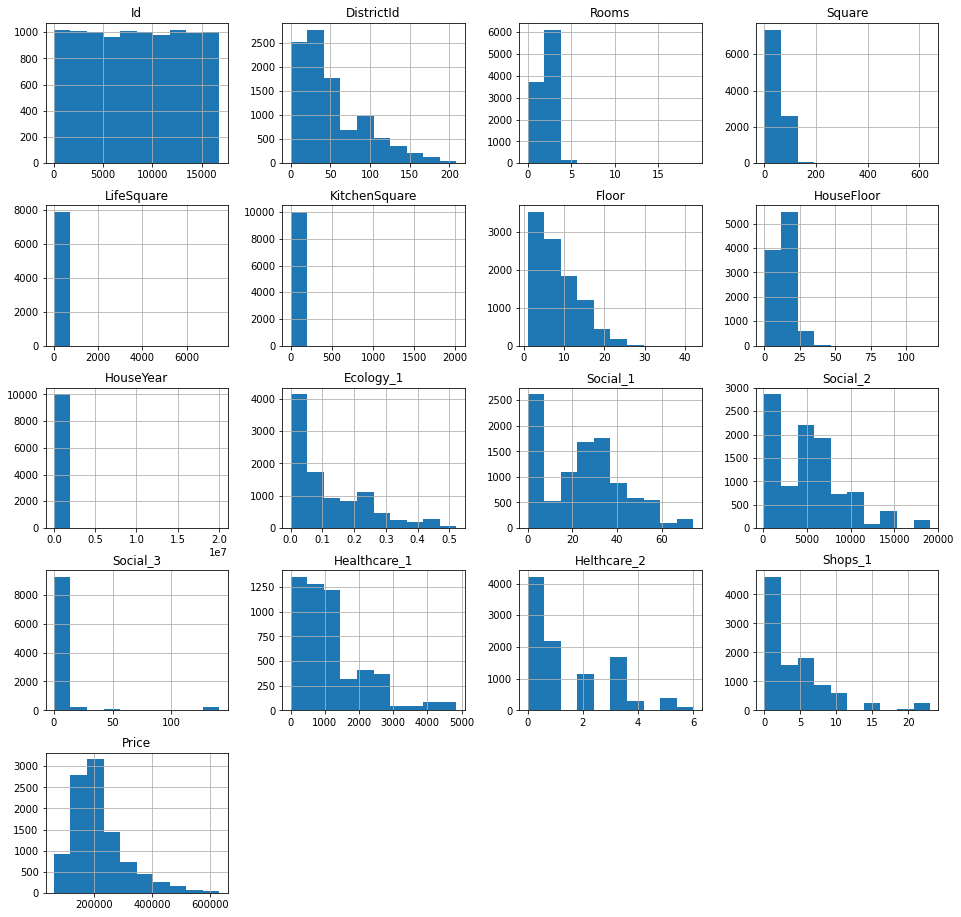

In [ ]:
df.hist(figsize=(16,16));

**Приведение типов данных**

In [ ]:
df['Id'] = df['Id'].astype(str)
df['DistrictId'] = df['DistrictId'].astype(str)

**Обработка пропусков**

In [ ]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Healthcare_1

In [ ]:
# Почти половина значений отсутствует, поэтому данный столбец лучше удалить
df.drop(columns='Healthcare_1', inplace=True)

LifeSquare

In [ ]:
df["LifeSquare"] = df["LifeSquare"].fillna(df['Square'] - df["KitchenSquare"])

**Обработка выбросов**

Rooms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


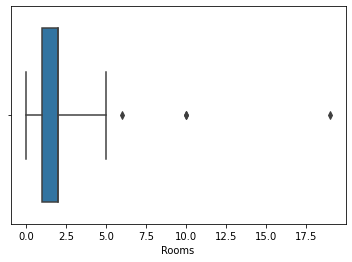

In [ ]:
sns.boxplot(df["Rooms"], whis=3)

In [ ]:
# Количество комнат не может быть равным 0
df.loc[df["Rooms"] == 0, 'Rooms'] = 1

In [ ]:
df.loc[df["Rooms"] > 5, 'Rooms'] = df['Rooms'].median()

Square

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


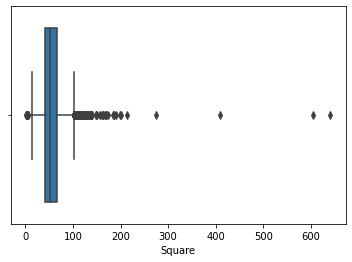

In [ ]:
sns.boxplot(df["Square"], whis=1.5)

In [ ]:
condition = (df['Square'] > np.quantile(df['Square'], q=0.975)) | (df['Square'] < np.quantile(df['Square'], q=0.025))
df.loc[condition, 'Square'] = df['Square'].median()
df['Square'].describe()

count    10000.000000
mean        55.108599
std         15.215053
min         32.105270
25%         42.432730
50%         52.513310
75%         64.591720
max        100.904263
Name: Square, dtype: float64

LifeSquare

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


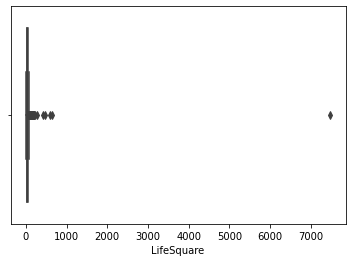

In [ ]:
sns.boxplot(df["LifeSquare"], whis=1.5)

In [ ]:
condition = (df['LifeSquare'] > df['LifeSquare'].quantile(0.975)) | (df['LifeSquare'] < df['LifeSquare'].quantile(0.025))
df.loc[condition, 'LifeSquare'] = df['LifeSquare'].median()
df['LifeSquare'].describe()

count    10000.000000
mean        39.907080
std         16.231212
min         15.139651
25%         27.885244
50%         37.040829
75%         48.129168
max         86.849086
Name: LifeSquare, dtype: float64

KitchenSquare

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


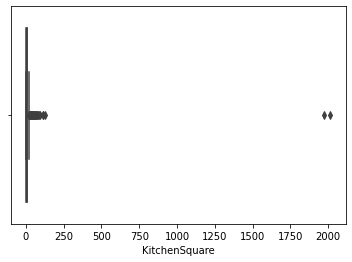

In [ ]:
sns.boxplot(df["KitchenSquare"], whis=1.5)

In [ ]:
# в квартирах-студиях кухня может отсутствовать 
condition = (df['KitchenSquare'] > df['KitchenSquare'].quantile(0.975))
df.loc[condition, 'KitchenSquare'] = df['KitchenSquare'].median()
df['KitchenSquare'].describe()

count    10000.000000
mean         5.536700
std          3.670668
min          0.000000
25%          1.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: KitchenSquare, dtype: float64

Floor and HouseFloor

In [ ]:
# проверяем не превышает ли значение этажа количество этажей в доме
df[df['Floor'] > df['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
17,1190,8,2.0,49.396000,28.299600,5.0,6,5.0,1962,0.458174,B,A,26,4439,1,1,5,B,186971.926566
19,367,45,1.0,42.367289,40.012529,1.0,16,14.0,2015,0.195781,B,B,23,5212,6,3,2,B,250466.980777
21,8471,20,3.0,75.611065,47.494621,8.0,11,9.0,1976,0.019509,B,B,37,7687,11,5,5,B,366916.246494
24,4717,27,1.0,44.203947,44.203947,0.0,2,0.0,1977,0.072158,B,B,2,629,1,0,0,A,135466.559958
25,4521,6,2.0,65.409965,64.409965,1.0,18,1.0,1977,0.243205,B,B,5,1564,0,0,0,B,191205.272608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056784,37.040829,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,1,10,B,524365.550705
9968,9920,1,3.0,86.487550,85.487550,1.0,18,17.0,1977,0.007122,B,B,1,264,0,0,1,B,248248.935528
9970,13501,6,1.0,41.310416,19.117077,9.0,18,17.0,1977,0.243205,B,B,5,1564,0,0,0,B,114878.830713
9975,4944,6,2.0,52.573133,51.573133,1.0,18,17.0,1977,0.243205,B,B,5,1564,0,0,0,B,154366.031184


In [ ]:
df.loc[df['Floor'] > df['HouseFloor'],'Floor'] = df['Floor'].median()
df.loc[df['Floor'] > df['HouseFloor'],'HouseFloor'] = df['HouseFloor'].median()

HouseYear

In [ ]:
df['HouseYear'].sort_values()

6794        1910
2795        1912
2066        1912
6250        1914
7610        1916
          ...   
8296        2020
2350        2020
7246        2020
8828        4968
9163    20052011
Name: HouseYear, Length: 10000, dtype: int64

In [ ]:
df.loc[df['HouseYear'] > 2020,'HouseYear'] = 2020

**Построение новых признаков**

Бинарные переменные

In [ ]:
binar = {'A': 0, 'B': 1}
df['Ecology_2'] = df['Ecology_2'].replace(binar)
df['Ecology_3'] = df['Ecology_3'].replace(binar)
df['Shops_2'] = df['Shops_2'].replace(binar)

Категория дома по году постройки

In [ ]:
def year_to_cat(X):

    X['year_category'] = 0

    X.loc[X['HouseYear'] <= 1950, 'year_category'] = 1
    X.loc[(X['HouseYear'] > 1950) & (X['HouseYear'] <= 1980), 'year_category'] = 2
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_category'] = 3
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_category'] = 4
    X.loc[(X['HouseYear'] > 2010), 'year_category'] = 5

    return X

In [ ]:
df = year_to_cat(df)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,year_category
0,11809,27,3.0,52.513310,37.040829,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,5
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,2
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,3
3,2352,1,1.0,40.409907,39.409907,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,2
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,2


Зависимость цены от года постройки дома

In [ ]:
median_price_by_year_cat =  df.groupby(['year_category']).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByYear'})

In [ ]:
median_price_by_year_cat

,MedPriceByYear
year_category,
1,357700.724533
2,184630.102748
3,228572.836092
4,244041.715715
5,176189.032419


In [ ]:
df = df.merge(median_price_by_year_cat, on=['year_category'], how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,year_category,MedPriceByYear
0,11809,27,3.0,52.513310,37.040829,10.0,4,10.0,2014,0.075424,...,1,11,3097,0,0,0,1,305018.871089,5,176189.032419
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,30,6207,1,1,0,1,177734.553407,2,184630.102748
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,1,33,5261,0,3,1,1,282078.720850,3,228572.836092
3,2352,1,1.0,40.409907,39.409907,1.0,10,22.0,1977,0.007122,...,1,1,264,0,0,1,1,168106.007630,2,184630.102748
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,1,33,8667,2,0,6,1,343995.102962,2,184630.102748


Зависимость цены от района,в котором расположен дом

In [ ]:
district_size = df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

In [ ]:
district_size

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294
...,...,...
200,199,1
201,117,1
202,207,1
203,209,1


In [ ]:
df = df.merge(district_size, on=['DistrictId'], how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,year_category,MedPriceByYear,DistrictSize
0,11809,27,3.0,52.513310,37.040829,10.0,4,10.0,2014,0.075424,...,11,3097,0,0,0,1,305018.871089,5,176189.032419,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1,0,1,177734.553407,2,184630.102748,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,3,1,1,282078.720850,3,228572.836092,652
3,2352,1,1.0,40.409907,39.409907,1.0,10,22.0,1977,0.007122,...,1,264,0,0,1,1,168106.007630,2,184630.102748,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,0,6,1,343995.102962,2,184630.102748,89


In [ ]:
df['IsDistrictLarge'] = (df['DistrictSize'] > 100).astype(int)

In [ ]:
median_price_by_district =  df.groupby(['DistrictId']).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByDistrict'})

In [ ]:
df = df.merge(median_price_by_district, on=['DistrictId'], how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Shops_2,Price,year_category,MedPriceByYear,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,52.513310,37.040829,10.0,4,10.0,2014,0.075424,...,0,0,0,1,305018.871089,5,176189.032419,851,1,146171.433190
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,1,0,1,177734.553407,2,184630.102748,78,0,183678.134031
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,3,1,1,282078.720850,3,228572.836092,652,1,183663.443595
3,2352,1,1.0,40.409907,39.409907,1.0,10,22.0,1977,0.007122,...,0,0,1,1,168106.007630,2,184630.102748,652,1,183663.443595
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,2,0,6,1,343995.102962,2,184630.102748,89,0,181706.718894


**Отбор признаков**

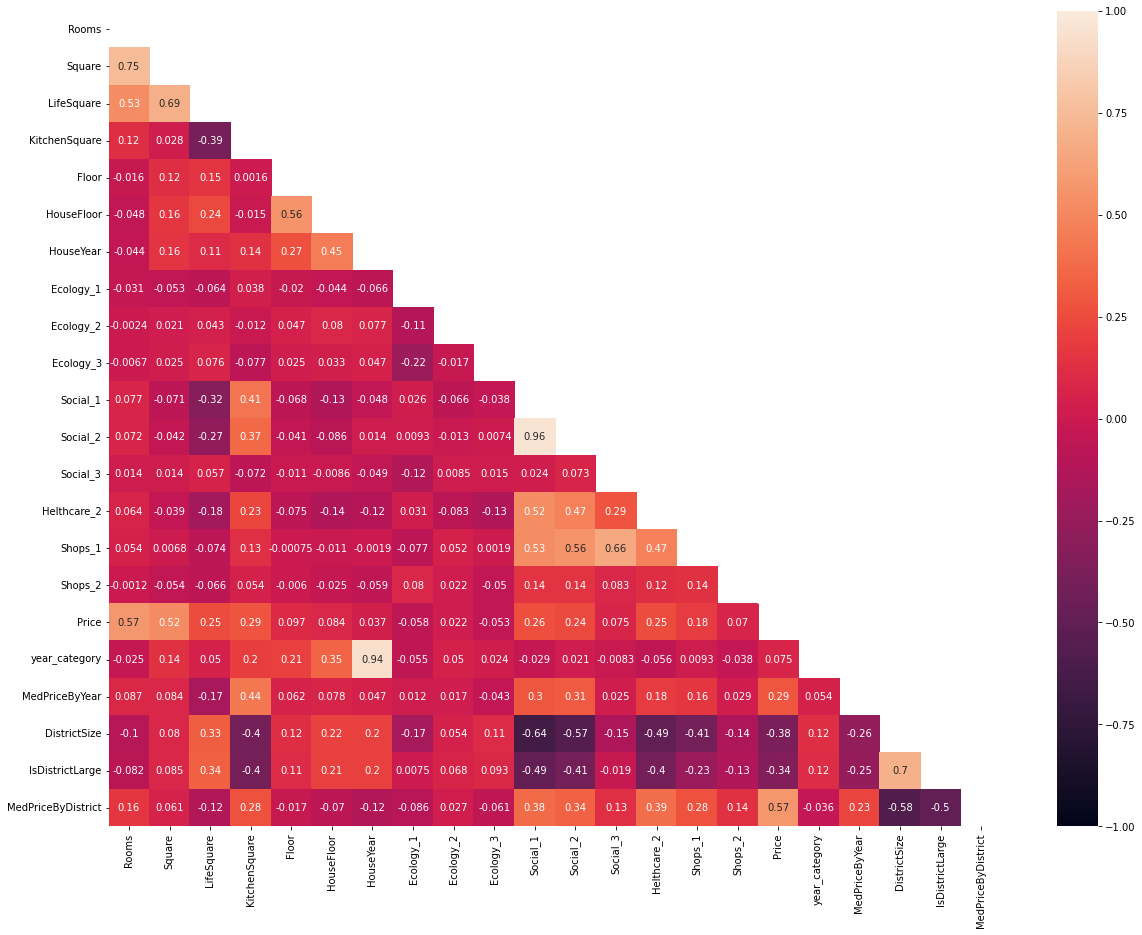

In [ ]:
cor_matrix_mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=cor_matrix_mask)

In [ ]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'year_category',
 'MedPriceByYear',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [ ]:
feature = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature = ['year_category', 'MedPriceByYear', 'DistrictSize', 'IsDistrictLarge', 'MedPriceByDistrict']

target = ['Price']

**Разбиение на выборки**

In [ ]:
x = df.drop(columns=target)
y = df[target]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)

In [ ]:
x_train = x_train[feature + new_feature]
x_valid = x_valid[feature + new_feature]

**Построение модели**

In [ ]:
model = RandomForestRegressor(random_state=21, max_depth=15, max_features=10, n_estimators=250)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=15, max_features=10, n_estimators=250,
                      random_state=21)

In [ ]:
y_train_preds = model.predict(x_train)
y_test_preds = model.predict(x_valid)



**Оценка модели**

In [ ]:
evaluate_preds(y_train, y_train_preds)

R2:	0.949
RMSE:	20687.532
MSE:	427973996.472


In [ ]:
evaluate_preds(y_valid, y_test_preds)

R2:	0.727
RMSE:	50163.474
MSE:	2516374083.104


**Кросс-валидация**

In [ ]:
cv_score = cross_val_score(model, x_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
cv_score

array([0.71959567, 0.75186655, 0.71135999])

**Важность признаков**

In [ ]:
pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
20,MedPriceByDistrict,0.229558
1,Square,0.193936
0,Rooms,0.173101
2,LifeSquare,0.072665
18,DistrictSize,0.064808
11,Social_2,0.034270
6,HouseYear,0.032688
10,Social_1,0.030663
5,HouseFloor,0.028156
12,Social_3,0.026836


**Прогнозирование на тестовом датасете**

#Выполнение для тестового датасета тех же этапов обработки и построения признаков

In [ ]:
df_test['Id'] = df_test['Id'].astype(str)
df_test['DistrictId'] = df_test['DistrictId'].astype(str)

In [ ]:
df_test.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [ ]:
df_test.drop(columns='Healthcare_1', inplace=True)

In [ ]:
df_test["LifeSquare"] = df_test["LifeSquare"].fillna(df_test['Square'] - df_test["KitchenSquare"])

In [ ]:
df_test.loc[df_test["Rooms"] == 0, 'Rooms'] = 1

In [ ]:
df_test.loc[df_test["Rooms"] > 5, 'Rooms'] = df_test["Rooms"].median()

In [ ]:
condition = (df_test['Square'] > np.quantile(df_test['Square'], q=0.975)) | (df_test['Square'] < np.quantile(df_test['Square'], q=0.025))
df_test.loc[condition, 'Square'] = df_test['Square'].median()
df_test['Square'].describe()

count    5000.000000
mean       55.450402
std        15.286441
min        32.113449
25%        42.703356
50%        52.921340
75%        65.215668
max       100.729995
Name: Square, dtype: float64

In [ ]:
condition = (df_test['LifeSquare'] > df_test['LifeSquare'].quantile(0.975)) | (df_test['LifeSquare'] < df_test['LifeSquare'].quantile(0.025))
df_test.loc[condition, 'LifeSquare'] = df_test['LifeSquare'].median()
df_test['LifeSquare'].describe()

count    5000.000000
mean       40.015334
std        16.157157
min        14.512236
25%        28.102201
50%        36.936106
75%        48.509202
max        85.195306
Name: LifeSquare, dtype: float64

In [ ]:
condition = (df_test['KitchenSquare'] > df_test['KitchenSquare'].quantile(0.975))
df_test.loc[condition, 'KitchenSquare'] = df_test['KitchenSquare'].median()
df_test['KitchenSquare'].describe()

count    5000.000000
mean        5.530200
std         3.589772
min         0.000000
25%         1.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: KitchenSquare, dtype: float64

In [ ]:
df_test.loc[df_test['Floor'] > df_test['HouseFloor'],'Floor'] = df_test['Floor'].median()
df_test.loc[df_test['Floor'] > df_test['HouseFloor'],'HouseFloor'] = df_test['HouseFloor'].median()

In [ ]:
df_test.loc[df_test['HouseYear'] > 2020,'HouseYear'] = 2020

In [ ]:
binar = {'A': 0, 'B': 1}
df_test['Ecology_2'] = df_test['Ecology_2'].replace(binar)
df_test['Ecology_3'] = df_test['Ecology_3'].replace(binar)
df_test['Shops_2'] = df_test['Shops_2'].replace(binar)

In [ ]:
df_test = year_to_cat(df_test)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,year_category
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,2
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,5
2,960,27,2.0,59.463678,50.463678,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,2
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,2
4,746,74,1.0,53.837056,52.837056,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,2


In [ ]:
df_test = df_test.merge(median_price_by_year_cat, on=['year_category'], how='left')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,year_category,MedPriceByYear
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,2,184630.102748
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,5,176189.032419
2,960,27,2.0,59.463678,50.463678,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,2,184630.102748
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,2,184630.102748
4,746,74,1.0,53.837056,52.837056,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,2,184630.102748


In [ ]:
district_size = df_test['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

In [ ]:
df_test = df_test.merge(district_size, on=['DistrictId'], how='left')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,year_category,MedPriceByYear,DistrictSize
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,1,24,4378,0,1,1,1,2,184630.102748,46
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,1,2,629,1,0,0,0,5,176189.032419,122
2,960,27,2.0,59.463678,50.463678,9.0,19,19.0,1977,0.211401,...,1,9,1892,0,0,1,1,2,184630.102748,391
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,1,2,475,0,0,0,1,2,184630.102748,264
4,746,74,1.0,53.837056,52.837056,1.0,8,17.0,1977,0.309479,...,1,35,7715,4,0,6,1,2,184630.102748,61


In [ ]:
df_test['IsDistrictLarge'] = (df_test['DistrictSize'] > 100).astype(int)

In [ ]:
df_test = df_test.merge(median_price_by_district, on=['DistrictId'], how='left')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,year_category,MedPriceByYear,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,4378,0,1,1,1,2,184630.102748,46,0,208164.464747
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,629,1,0,0,0,5,176189.032419,122,1,162067.275050
2,960,27,2.0,59.463678,50.463678,9.0,19,19.0,1977,0.211401,...,1892,0,0,1,1,2,184630.102748,391,1,146171.433190
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,475,0,0,0,1,2,184630.102748,264,1,113789.561738
4,746,74,1.0,53.837056,52.837056,1.0,8,17.0,1977,0.309479,...,7715,4,0,6,1,2,184630.102748,61,0,195610.960042


In [ ]:
df_test["MedPriceByDistrict"] = df_test["MedPriceByDistrict"].fillna(189439.6093582073)

In [ ]:
df_test = df_test[feature + new_feature]

#Прогнозирование на тестовом датасете

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [ ]:
predictions = model.predict(df_test)

In [ ]:
predictions

array([162693.67130806, 130893.66248542, 149993.61747852, ...,
       149875.93934087, 196021.28930228, 275546.43088231])

In [ ]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,162693.671308
1,5925,130893.662485
2,960,149993.617479
3,3848,170547.751277
4,746,181898.617370


In [ ]:
submit.to_csv('df_submit.csv', index=False)

**Kaggle:**
Private Score
0.70727;  
Public Score
0.71040